# 第3章: 正規表現

### On this page  
20. JSONデータの読み込み  
21. カテゴリ名を含む行を抽出  
22. カテゴリ名の抽出  
23. セクション構造   
24. ファイル参照の抽出  
25. テンプレートの抽出  
26. 強調マークアップの除去  
27. 内部リンクの除去  
28. MediaWikiマークアップの除去  
29. 国旗画像のURLを取得する  

### Intro
Wikipediaの記事を以下のフォーマットで書き出したファイルjawiki-country.json.gzがある．  

1行に1記事の情報がJSON形式で格納される  
各行には記事名が”title”キーに，記事本文が”text”キーの辞書オブジェクトに格納され，そのオブジェクトがJSON形式で書き出される  
ファイル全体はgzipで圧縮される  
以下の処理を行うプログラムを作成せよ  

### Reference
https://ja.wikipedia.org/wiki/Help:%E6%97%A9%E8%A6%8B%E8%A1%A8

## 前準備(データの準備)

In [3]:
!wget "https://nlp100.github.io/data/jawiki-country.json.gz" -P data/

# -P : ディレクトリ指定
# 今回は"data/"の中にgzがダウンロードされる

--2023-04-10 09:38:55--  https://nlp100.github.io/data/jawiki-country.json.gz
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.111.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5068362 (4.8M) [application/gzip]
Saving to: ‘data/jawiki-country.json.gz’

jawiki-country.json 100%[===================>]   4.83M  10.5MB/s    in 0.5s    

2023-04-10 09:38:57 (10.5 MB/s) - ‘data/jawiki-country.json.gz’ saved [5068362/5068362]



In [4]:
!gunzip data/jawiki-country.json.gz
# gzファイルの解凍

In [15]:
!head -n1 data/jawiki-country.json | cut -c-200
# ファイルの1行目だけ確認
# cut -c-200 : 200文字まで表示

{"title": "エジプト", "text": "{{otheruses|主に現代のエジプト・アラブ共和国|古代|古代エジプト}}\n{{基礎情報 国\n|略名 =エジプト\n|漢字書き=埃及\n|日本語


## 20.JSONデータの読み込み
Wikipedia記事のJSONファイルを読み込み，「イギリス」に関する記事本文を表示せよ．問題21-29では，ここで抽出した記事本文に対して実行せよ．

In [7]:
import json

with open('data/jawiki-country.json', 'r') as fi, open('data/jawiki-country-uk.txt', 'w') as fo:
    for line in fi:
        doc = json.loads(line)
        if doc["title"]=="イギリス":
            fo.write(doc["text"])

    
# json.load():JSONデータto辞書型・リスト
# json.loads():JSON形式の文字列to辞書型 (jsonl を読むならこっち)

In [10]:
!head data/jawiki-country-uk.txt
print("------------")
!tail data/jawiki-country-uk.txt

{{redirect|UK}}
{{redirect|英国|春秋時代の諸侯国|英 (春秋)}}
{{Otheruses|ヨーロッパの国|長崎県・熊本県の郷土料理|いぎりす}}
{{基礎情報 国
|略名  =イギリス
|日本語国名 = グレートブリテン及び北アイルランド連合王国
|公式国名 = {{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />
*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（[[スコットランド・ゲール語]]）
*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（[[ウェールズ語]]）
*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（[[アイルランド語]]）
------------
{{デフォルトソート:いきりす}}
[[Category:イギリス|*]]
[[Category:イギリス連邦加盟国]]
[[Category:英連邦王国|*]]
[[Category:G8加盟国]]
[[Category:欧州連合加盟国|元]]
[[Category:海洋国家]]
[[Category:現存する君主国]]
[[Category:島国]]
[[Category:1801年に成立した国家・領域]]

## 21.カテゴリ名を含む行を抽出
記事中でカテゴリ名を宣言している行を抽出せよ．

[[Category:ヘルプ|はやみひよう]]
の形式で書かれるらしい

In [2]:
import re

def txt_clean_line_generator(*, file_path):
    with open(file_path, 'r') as fi:
        for line in fi:
            line = line.rstrip()
            if line:
                yield line

def search_line_by_pattern(*, pattern, file_path):
    for line in txt_clean_line_generator(file_path=file_path):
        if pattern.match(line):
            yield line

### パターン1

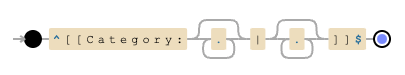

In [3]:
pattern = re.compile(r'^\[\[Category:.*\|.*\]\]$')
print(*search_line_by_pattern(pattern=pattern, file_path='data/jawiki-country-uk.txt'), sep='\n')

[[Category:イギリス|*]]
[[Category:英連邦王国|*]]
[[Category:欧州連合加盟国|元]]


### パターン2
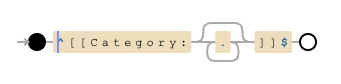

In [4]:
pattern = re.compile(r'^\[\[Category:.*\]\]$')
print(*search_line_by_pattern(pattern=pattern, file_path='data/jawiki-country-uk.txt'), sep='\n')

[[Category:イギリス|*]]
[[Category:イギリス連邦加盟国]]
[[Category:英連邦王国|*]]
[[Category:G8加盟国]]
[[Category:欧州連合加盟国|元]]
[[Category:海洋国家]]
[[Category:現存する君主国]]
[[Category:島国]]
[[Category:1801年に成立した国家・領域]]


---


### メモ
- 正規表現を使うときは`r'正規表現'`と書くべき
  - https://docs.python.org/ja/3.8/library/re.html
  - エラーになることがある（なお，どういうときにエラーになるかはいまいち理解していない）
- パターンは先にコンパイルすると早い
- 今回はgeneratorを使用してみた
  - 一個ずつ返してくれる（メモリ使用量が減る）
    - なお，今回は返すものが大きくないのでGeneratorを使うメリットはあまりない
  - printするときは`*`でアンパック的なことができるらしい
- 正規表現チェッカーを使う
  - https://www.debuggex.com/ 個人的にはこれが好き
  - https://regex101.com/ これは先輩からおすすめされたもう一個のやつ
- 関数名に`*`を入れると，それ以降はKeyword Argumentになる
  - つまり，関数呼び出しのときに引数名の指定が必須になる
  - 昔書いたコードの引数の順番なんて覚えてない場合が多いので，keyword argumentにすることで順番を間違えるリスクを無くす

---

## 22.カテゴリ名の抽出
記事のカテゴリ名を（行単位ではなく名前で）抽出せよ．

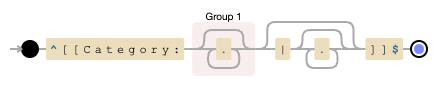

In [5]:
pattern_category = re.compile(r'^\[\[Category:(.*?)(?:\|.*)?\]\]$')
for line in txt_clean_line_generator(file_path='data/jawiki-country-uk.txt'):
    match = pattern_category.match(line)
    if match:
        print(match.group(1))

イギリス
イギリス連邦加盟国
英連邦王国
G8加盟国
欧州連合加盟国
海洋国家
現存する君主国
島国
1801年に成立した国家・領域


---
### メモ
- `*?`は最短マッチ（貧困マッチ）
  - これをしないと`|`以降もグループに入ってしまう
- (?: )はキャプチャなしのグルーピング
- assertは簡易的なテスト
  - 今回はカテゴリー名を抽出する前にそもそもカテゴリ名を含むかどうかを確認している
  - もちろんカテゴリー名を含まない場合はそもそも次のreturnの行でエラーを出すので必要かと言われるとひつようではない．
  - が，コードの仕様は書いた翌日には忘れてしまうのでこういう検証はこまめにするべき（by Benさん）

--- 

In [6]:
for line in txt_clean_line_generator(file_path='data/jawiki-country-uk.txt'):
    match = pattern_category.match(line)
    if match:
        print(match)

<re.Match object; span=(0, 19), match='[[Category:イギリス|*]]'>
<re.Match object; span=(0, 22), match='[[Category:イギリス連邦加盟国]]'>
<re.Match object; span=(0, 20), match='[[Category:英連邦王国|*]]'>
<re.Match object; span=(0, 18), match='[[Category:G8加盟国]]'>
<re.Match object; span=(0, 22), match='[[Category:欧州連合加盟国|元]]'>
<re.Match object; span=(0, 17), match='[[Category:海洋国家]]'>
<re.Match object; span=(0, 20), match='[[Category:現存する君主国]]'>
<re.Match object; span=(0, 15), match='[[Category:島国]]'>
<re.Match object; span=(0, 28), match='[[Category:1801年に成立した国家・領域]]'>


## 23.セクション構造
記事中に含まれるセクション名とそのレベル（例えば”== セクション名 ==”なら1）を表示せよ．  

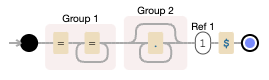

In [7]:
pattern_section = re.compile(r'(\=\=+)(.*?)\0$')
for line in txt_clean_line_generator(file_path='data/jawiki-country-uk.txt'):
    match = pattern_section.match(line)
    if match:
        section_name = match.group(2).strip()
        level = len(match.group(1))-1
        print(level, section_name)

---
### メモ
- `\1`は最初のグループと一緒，という処理．
- `==カテゴリ==`だったり`== カテゴリ ==`だったりするので，`strip()`をかけている
---

## 24.ファイル参照の抽出
記事から参照されているメディアファイルをすべて抜き出せ．  
`[[ファイル:Wikipedia-logo-v2-ja.png|thumb|説明文]]`  
cmd Fすると，28件引っかかるはず．  
※一行に複数のファイルがある可能性がある

### とりあえずファイル名だけわかればいいバージョン
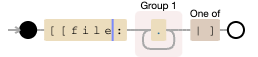  
崩れるので英語でfileとしているが，ファイルが正しい

In [8]:
import re
cnt = 0
pattern_media = re.compile(r'\[\[ファイル:(.+?)[|\]]')
with open('data/jawiki-country-uk.txt', 'r') as f:
    for line in f:
        for match in pattern_media.finditer(line):
            print(match.group(1))
            cnt += 1
print(cnt)

Royal Coat of Arms of the United Kingdom.svg
United States Navy Band - God Save the Queen.ogg
Descriptio Prime Tabulae Europae.jpg
Lenepveu, Jeanne d'Arc au siège d'Orléans.jpg
London.bankofengland.arp.jpg
Battle of Waterloo 1815.PNG
Uk topo en.jpg
BenNevis2005.jpg
Population density UK 2011 census.png
2019 Greenwich Peninsula & Canary Wharf.jpg
Birmingham Skyline from Edgbaston Cricket Ground crop.jpg
Leeds CBD at night.jpg
Glasgow and the Clyde from the air (geograph 4665720).jpg
Palace of Westminster, London - Feb 2007.jpg
Scotland Parliament Holyrood.jpg
Donald Trump and Theresa May (33998675310) (cropped).jpg
Soldiers Trooping the Colour, 16th June 2007.jpg
City of London skyline from London City Hall - Oct 2008.jpg
Oil platform in the North SeaPros.jpg
Eurostar at St Pancras Jan 2008.jpg
Heathrow Terminal 5C Iwelumo-1.jpg
Airbus A380-841 G-XLEB British Airways (10424102995).jpg
UKpop.svg
Anglospeak.svg
Royal Aberdeen Children's Hospital.jpg
CHANDOS3.jpg
The Fabs.JPG
Wembley Stadi

---
### メモ
- 一行の中で複数ヒット対象があり，すべてをとってきたいときは`pattern.findall()`or`pattern.finditer()`を使う
  - 違いはリストで返ってくるかイテレータで返ってくるか
---

### 付加情報も合わせてガチでとってくるなら
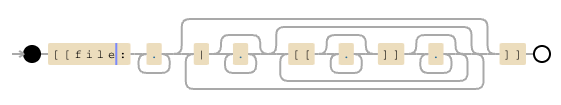  
これでもまだ不十分なところはあるかもしれない


In [9]:
pattern_media = re.compile(r'\[\[ファイル:(?:.+?)(?:\|.*?(?:\[\[.*?\]\].*?)*?)*?\]\]')
cnt = 0
output_example = True
for line in txt_clean_line_generator(file_path='data/jawiki-country-uk.txt'):
    for match in pattern_media.finditer(line):
        if output_example:
            print('==== example ====')
            print(match.group(0))
            print('==== example ====')
            output_example = False
        file_span_txt = match.group(0)
        file_path = file_span_txt[7:-2].split('|')[0]
        print(file_path)
        cnt += 1
print(cnt)

==== example ====
[[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]
==== example ====
Royal Coat of Arms of the United Kingdom.svg
United States Navy Band - God Save the Queen.ogg
Descriptio Prime Tabulae Europae.jpg
Lenepveu, Jeanne d'Arc au siège d'Orléans.jpg
London.bankofengland.arp.jpg
Battle of Waterloo 1815.PNG
Uk topo en.jpg
BenNevis2005.jpg
Population density UK 2011 census.png
2019 Greenwich Peninsula & Canary Wharf.jpg
Birmingham Skyline from Edgbaston Cricket Ground crop.jpg
Leeds CBD at night.jpg
Glasgow and the Clyde from the air (geograph 4665720).jpg
Palace of Westminster, London - Feb 2007.jpg
Scotland Parliament Holyrood.jpg
Donald Trump and Theresa May (33998675310) (cropped).jpg
Soldiers Trooping the Colour, 16th June 2007.jpg
City of London skyline from London City Hall - Oct 2008.jpg
Oil platform in the North SeaPros.jpg
Eurostar at St Pancras Jan 2008.jpg
Heathrow Terminal 5C Iwelumo-1.jpg
Airbus A380-841 G-XLEB British Airways (10424102995).jpg


## 25.テンプレートの抽出
記事中に含まれる「基礎情報」テンプレートのフィールド名と値を抽出し，辞書オブジェクトとして格納せよ．  
`{{テンプレート名|テンプレート変数1=引数1|テンプレート変数2=引数2|.....}}`

[Template:基礎情報 国](https://ja.wikipedia.org/wiki/Template:%E5%9F%BA%E7%A4%8E%E6%83%85%E5%A0%B1_%E5%9B%BD)
```
{{基礎情報 国
|自治領等 = 
|略名 = 
|日本語国名 = 
（略）
|注記 = 
}}
```

### とりあえず中身を見てみる。

In [41]:
in_template = False
for i, line in enumerate(txt_clean_line_generator(file_path='data/jawiki-country-uk.txt')):
    if line.startswith('{{基礎情報'):
        in_template = True
        print(i, line)
        continue
    if line.startswith('}}'):
        print(i, line)
        break
    if in_template:
        print(i, line)

3 {{基礎情報 国
4 |略名  =イギリス
5 |日本語国名 = グレートブリテン及び北アイルランド連合王国
6 |公式国名 = {{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />
7 *{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（[[スコットランド・ゲール語]]）
8 *{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（[[ウェールズ語]]）
9 *{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（[[アイルランド語]]）
10 *{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（[[コーンウォール語]]）
11 *{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（[[スコットランド語]]）
12 **{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>
13 |国旗画像 = Flag of the United Kingdom.svg
14 |国章画像 = [[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]
15 |国章リンク =（[[イギリスの国章|国章]]）
16 |標語 = {{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Dieu et mon droit|神と我が権利]]）
17 |国歌 = [[女王陛下万歳|{{lang|en|

### どうやら一つのフィールドが複数行占めることがあるらしい。

In [42]:
import pprint

def get_field_lines():
    in_template = False
    field_lines = []

    for i, line in enumerate(txt_clean_line_generator(file_path='data/jawiki-country-uk.txt')):
        if line.startswith('{{基礎情報'):
            in_template = True
            continue
        if line.startswith('}}'):
            break
        if in_template:
            if line.startswith('|'):
                field_lines.append(line)
            else:
                field_lines[-1] += line
    return field_lines
    
def extract_field_and_value(*, line: str, compiled_pattern) -> dict:
    match = compiled_pattern.match(line)
    return {match.group(1): match.group(2)}

def create_info_dict(*, field_lines: list) -> dict:
    info_dict = {}
    field_value_pattern = re.compile(r'^\|(.+?)\s*=\s*(.+)$')
    for field_line in field_lines:
        # python 3.9 以降
        info_dict |= extract_field_and_value(line=field_line, compiled_pattern=field_value_pattern)
        # python 3.9 以前
        # info_dict.update(extract_field_and_value(line=field_line, compiled_pattern=field_value_pattern))
    return info_dict

def p25():
    field_lines = get_field_lines()
    basic_info_dict = create_info_dict(field_lines=field_lines)
    return basic_info_dict

p25()

{'略名': 'イギリス',
 '日本語国名': 'グレートブリテン及び北アイルランド連合王国',
 '公式国名': '{{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（[[スコットランド・ゲール語]]）*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（[[ウェールズ語]]）*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（[[アイルランド語]]）*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（[[コーンウォール語]]）*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（[[スコットランド語]]）**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>',
 '国旗画像': 'Flag of the United Kingdom.svg',
 '国章画像': '[[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]',
 '国章リンク': '（[[イギリスの国章|国章]]）',
 '標語': '{{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Dieu et mon droit|神と我が権利]]）',
 '国歌': "[[女王陛下万歳|{{lang|en|God Save the Queen}}]]

### 26.強調マークアップの除去Permalink
25の処理時に，テンプレートの値からMediaWikiの強調マークアップ（弱い強調，強調，強い強調のすべて）を除去してテキストに変換せよ（参考: マークアップ早見表）．　

弱い強調 = 斜線 `''他との区別''`  
強調 = 太字 `'''強調'''`   
強い強調 = 太字斜線 `	'''''斜体と強調'''''`


In [43]:
def remove_emphasis(string: str) -> str:
    # クオーテーション4回のパターンがなかったので、それぞれ定義。
    italic_pattern = re.compile(r"\'\'(.+?)\'\'")
    bold_pattern = re.compile(r"\'\'\'(.+?)\'\'\'")
    italic_bold_pattern = re.compile(r"\'\'\'\'\'(.+?)\'\'\'\'\'")
    test_pattern = re.compile(r'2012')

    # sub() はヒットした部分を置換してくれる`
    string = italic_bold_pattern.sub(r'\1', string)
    string = bold_pattern.sub(r'\1', string)
    string = italic_pattern.sub(r'\1', string)
    return string

def remove_markup(string: str) -> str:
    string = remove_emphasis(string)
    return string

def p26():
    field_lines = get_field_lines()
    basic_info_dict = create_info_dict(field_lines=field_lines)
    print('++++++++++++++++++++++++++++++')
    print(basic_info_dict['国歌'])
    print(basic_info_dict['確立形態4'])
    basic_info_dict = {k: remove_markup(v) for k, v in basic_info_dict.items()}
    # pprint.pprint(basic_info_dict)
    print('++++++++++++++++++++++++++++++')
    print(basic_info_dict['国歌'])
    # return basic_info_dict
    

p26()



++++++++++++++++++++++++++++++
[[女王陛下万歳|{{lang|en|God Save the Queen}}]]{{en icon}}<br />''神よ女王を護り賜え''<br />{{center|[[ファイル:United States Navy Band - God Save the Queen.ogg]]}}
現在の国号「'''グレートブリテン及び北アイルランド連合王国'''」に変更
++++++++++++++++++++++++++++++
[[女王陛下万歳|{{lang|en|God Save the Queen}}]]{{en icon}}<br />神よ女王を護り賜え<br />{{center|[[ファイル:United States Navy Band - God Save the Queen.ogg]]}}


## 27.内部リンクの除去
26の処理に加えて，テンプレートの値からMediaWikiの内部リンクマークアップを除去し，テキストに変換せよ（参考: マークアップ早見表）．

`[[記事名]]`  
`[[記事名|表示文字]]`  
`[[記事名#節名|表示文字]]`  

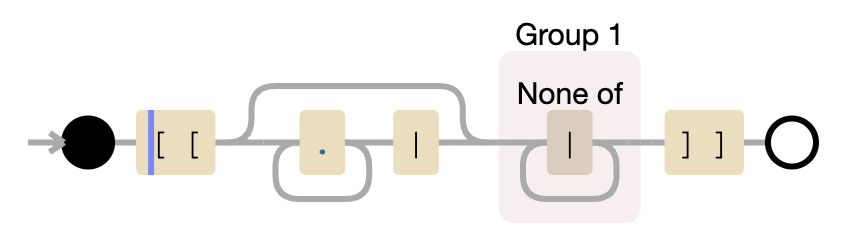

In [44]:
def remove_internal_links(string: str) -> str:
    # [[記事名]]
    internal_link_pattern1 = re.compile(r'\[\[([^|]+?)\]\]')
    string = internal_link_pattern1.sub(r'\1', string)

    # [[記事名|表示文字]]
    internal_link_pattern2 = re.compile(r'\[\[[^|]+?[|](.+?)\]\]')
    string = internal_link_pattern2.sub(r'\1', string)
    # print(string)
    return string

def remove_markup(string: str) -> str:
    string = remove_emphasis(string)
    string = remove_internal_links(string)
    return string

def p27():
    field_lines = get_field_lines()
    basic_info_dict = create_info_dict(field_lines=field_lines)
    print('++++++++++++++++++++++++++++++')
    print(basic_info_dict['確立形態1'])
    print(basic_info_dict['国歌'])
    basic_info_dict = {k: remove_markup(v) for k, v in basic_info_dict.items()}
    # pprint.pprint(basic_info_dict)
    print('++++++++++++++++++++++++++++++')
    print(basic_info_dict['確立形態1'])
    print(basic_info_dict['国歌'])
    print('++++++++++++++++++++++++++++++')
    return basic_info_dict


p27()


++++++++++++++++++++++++++++++
[[イングランド王国]]／[[スコットランド王国]]<br />（両国とも[[合同法 (1707年)|1707年合同法]]まで）
[[女王陛下万歳|{{lang|en|God Save the Queen}}]]{{en icon}}<br />''神よ女王を護り賜え''<br />{{center|[[ファイル:United States Navy Band - God Save the Queen.ogg]]}}
++++++++++++++++++++++++++++++
イングランド王国／スコットランド王国<br />（両国とも1707年合同法まで）
{{lang|en|God Save the Queen}}{{en icon}}<br />神よ女王を護り賜え<br />{{center|ファイル:United States Navy Band - God Save the Queen.ogg}}
++++++++++++++++++++++++++++++


{'略名': 'イギリス',
 '日本語国名': 'グレートブリテン及び北アイルランド連合王国',
 '公式国名': '{{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（スコットランド・ゲール語）*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（ウェールズ語）*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（アイルランド語）*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（コーンウォール語）*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（スコットランド語）**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>',
 '国旗画像': 'Flag of the United Kingdom.svg',
 '国章画像': '85px|イギリスの国章',
 '国章リンク': '（国章）',
 '標語': '{{lang|fr|Dieu et mon droit}}<br />（フランス語:神と我が権利）',
 '国歌': '{{lang|en|God Save the Queen}}{{en icon}}<br />神よ女王を護り賜え<br />{{center|ファイル:United States Navy Band - God Save the Queen.ogg}}',
 '地図画像': 'Europe-UK.svg',
 '

## 28.MediaWikiマークアップの除去Permalink
27の処理に加えて，テンプレートの値からMediaWikiマークアップを可能な限り除去し，国の基本情報を整形せよ．  
要するに、その他の記法も直しちゃいたい、ということ

In [46]:
def remove_linebreak(string: str) -> str:
    linebreak_pattern = re.compile(r'<br />')
    string = linebreak_pattern.sub('', string)
    return string

def remove_file(string: str) -> str:
    file_pattern = re.compile(r'\[\[ファイル:(?:.+?)(?:\|.*?(?:\[\[.*?\]\].*?)*?)*?\]\]')
    for match in file_pattern.finditer(string):
        file_span_txt = match.group(0)
        split = file_span_txt[7:-2].split('|')
        if len(split) > 1:
            string = string.replace(file_span_txt, split[-1])
        else:
            string = string.replace(file_span_txt, '')
    return string

def remove_ref(string: str) -> str:
    ref_pattern = re.compile(r'<ref(?:.+?)(?:/>|</ref>)')
    string = ref_pattern.sub('', string)
    return string

def remove_lang_template(string: str) -> str:
    lang_template_pattern = re.compile(r'{{lang[\|].*?[\|](.*?)}}')
    string = lang_template_pattern.sub(r'\1', string)
    return string

def remove_lang_icon(string: str) -> str:
    lang_icon_pattern = re.compile(r'{{.. icon}}')
    string = lang_icon_pattern.sub('', string)
    return string

def remove_hidden_zero(string: str) -> str:
    hidden_zero_pattern = re.compile(r'{{0+}}')
    string = hidden_zero_pattern.sub('', string)
    return string

def remove_align_center(string: str) -> str:
    align_center_pattern = re.compile(r'{{center[\|](.*?)}}')
    string = align_center_pattern.sub(r'\1', string)
    return string

def remove_virtual_link(string: str) -> str:
    virtual_link_pattern = re.compile(r'{{仮リンク[\|](.*?)[\|].*?}}')
    string = virtual_link_pattern.sub(r'\1', string)
    return string

def remove_markup(string: str) -> str:
    string = remove_emphasis(string)
    string = remove_file(string)
    string = remove_internal_links(string)
    string = remove_linebreak(string)
    string = remove_ref(string)
    string = remove_lang_template(string)
    string = remove_lang_icon(string)
    string = remove_hidden_zero(string)
    string = remove_align_center(string)
    string = remove_virtual_link(string)
    return string

def p28():
    field_lines = get_field_lines()
    basic_info_dict = create_info_dict(field_lines=field_lines)
    basic_info_dict = {k: remove_markup(v) for k, v in basic_info_dict.items()}
    return basic_info_dict


basic_info_dict = p28()
basic_info_dict

{'略名': 'イギリス',
 '日本語国名': 'グレートブリテン及び北アイルランド連合王国',
 '公式国名': 'United Kingdom of Great Britain and Northern Ireland',
 '国旗画像': 'Flag of the United Kingdom.svg',
 '国章画像': 'イギリスの国章',
 '国章リンク': '（国章）',
 '標語': 'Dieu et mon droit（フランス語:神と我が権利）',
 '国歌': 'God Save the Queen神よ女王を護り賜え',
 '地図画像': 'Europe-UK.svg',
 '位置画像': 'United Kingdom (+overseas territories) in the World (+Antarctica claims).svg',
 '公用語': '英語',
 '首都': 'ロンドン（事実上）',
 '最大都市': 'ロンドン',
 '元首等肩書': '女王',
 '元首等氏名': 'エリザベス2世',
 '首相等肩書': '首相',
 '首相等氏名': 'ボリス・ジョンソン',
 '他元首等肩書1': '貴族院議長',
 '他元首等氏名1': 'ノーマン・ファウラー',
 '他元首等肩書2': '庶民院議長',
 '他元首等氏名2': 'リンゼイ・ホイル',
 '他元首等肩書3': '最高裁判所長官',
 '他元首等氏名3': 'ブレンダ・ヘイル',
 '面積順位': '76',
 '面積大きさ': '1 E11',
 '面積値': '244,820',
 '水面積率': '1.3%',
 '人口統計年': '2018',
 '人口順位': '22',
 '人口大きさ': '1 E7',
 '人口値': '6643万5600',
 '人口密度値': '271',
 'GDP統計年元': '2012',
 'GDP値元': '1兆5478億',
 'GDP統計年MER': '2012',
 'GDP順位MER': '6',
 'GDP値MER': '2兆4337億',
 'GDP統計年': '2012',
 'GDP順位': '6',
 'GDP値': '2兆3162億',
 'GDP/人': '36,727',
 '建国形態

## 29.国旗画像のURLを取得する
テンプレートの内容を利用し，国旗画像のURLを取得せよ．（ヒント: [MediaWiki API](http://www.mediawiki.org/wiki/API:Main_page/ja)の[imageinfo](https://www.mediawiki.org/wiki/API:Imageinfo)を呼び出して，ファイル参照をURLに変換すればよい）

In [70]:
! pip install requests


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


In [57]:
import requests

S = requests.Session()

URL = "https://en.wikipedia.org/w/api.php"

PARAMS = {
    "action": "query",
    "format": "json",
    "prop": "imageinfo",
    "titles": "File:"+ basic_info_dict['国旗画像'],
    "iiprop": "url" # これしないとURLが取れない
}

R = S.get(url=URL, params=PARAMS)
DATA = R.json()
PAGES = DATA["query"]["pages"]
print(type(PAGES))  
print(PAGES)


<class 'dict'>
{'23473560': {'pageid': 23473560, 'ns': 6, 'title': 'File:Flag of the United Kingdom.svg', 'imagerepository': 'local', 'imageinfo': [{'url': 'https://upload.wikimedia.org/wikipedia/en/a/ae/Flag_of_the_United_Kingdom.svg', 'descriptionurl': 'https://en.wikipedia.org/wiki/File:Flag_of_the_United_Kingdom.svg', 'descriptionshorturl': 'https://en.wikipedia.org/w/index.php?curid=23473560'}]}}


In [71]:
for k, v in PAGES.items():
    url = v['imageinfo'][0]['url']
    break
print(url)

https://upload.wikimedia.org/wikipedia/en/a/ae/Flag_of_the_United_Kingdom.svg


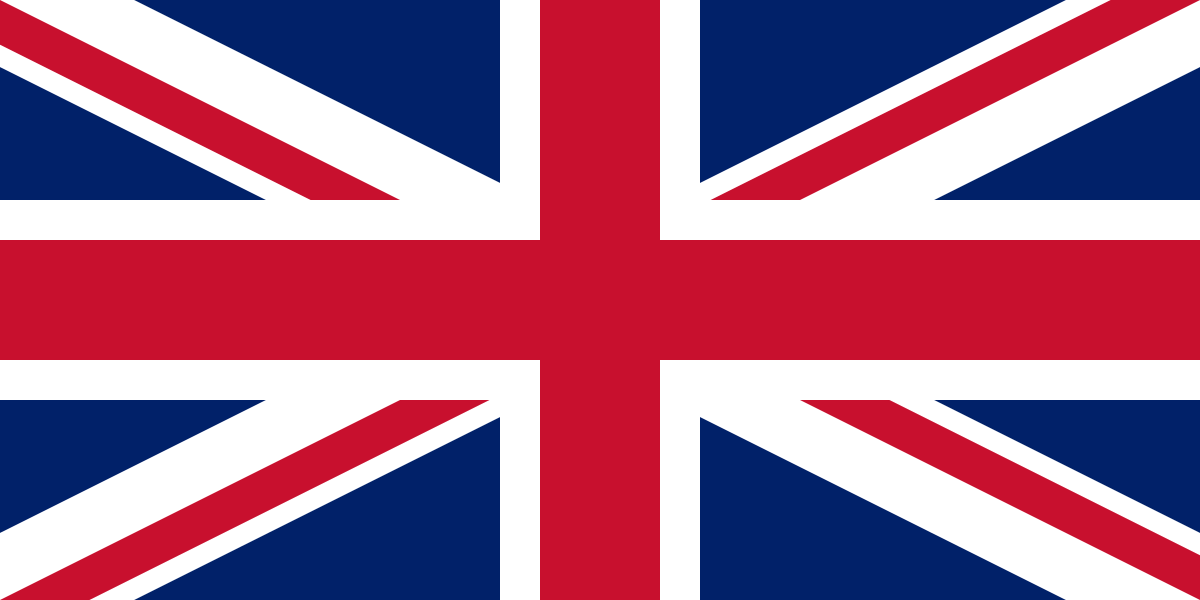

In [73]:
from IPython.display import SVG, display

display(SVG(url=url))